In [1]:
import os
from pathlib import Path

# Định nghĩa các đường dẫn
BASE_DIR = Path("..").resolve()  # hoặc Path(".").resolve() nếu chạy trong notebook tại thư mục code/
print(f"Base directory: {BASE_DIR}")
CORRECTED_DIR = BASE_DIR / "archive" / "transcripts_corrected_quangdm4_cutoff_17_07" / "transcripts_corrected"
AUDIO_DIR     = BASE_DIR / "archive" / "tts_dataset_best_call_agent_audio" / "tts_dataset_best_call_agent_audio" / "wavs"

# Lấy danh sách các file transcript đã được hiệu chỉnh
corrected_txt_files = sorted(CORRECTED_DIR.glob("*.txt"))
print(f"Found {len(corrected_txt_files)} corrected transcripts.")



# Ghép với audio tương ứng
matched_samples = []
for txt_file in corrected_txt_files:
    base_name = txt_file.stem  # không đuôi
    wav_file = AUDIO_DIR / f"{base_name}.wav"
    if wav_file.exists():
        matched_samples.append((wav_file, txt_file))
    else:
        print(f"⚠️ Missing audio for {base_name}")

print(f"✅ Matched {len(matched_samples)} audio-transcript pairs.")

# Ví dụ: in ra 5 cặp đầu
for wav_path, txt_path in matched_samples[:5]:
    print(f"WAV: {wav_path.name} | TXT: {txt_path.name}")

Base directory: /home/kylh/work/vpb_dataset
Found 1327 corrected transcripts.
⚠️ Missing audio for .progress
✅ Matched 1326 audio-transcript pairs.
WAV: E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000000150___left___000004650.wav | TXT: E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000000150___left___000004650.txt
WAV: E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000004502___left___000007466.wav | TXT: E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000004502___left___000007466.txt
WAV: E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000000374___left___000001514.wav | TXT: E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000000374___left___000001514.txt
WAV: E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000001590___left___000002730.wav | TXT: E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000001590___left___000002730.txt
WAV: E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000002550___left___000006122.wav | TXT: E_thaond3

In [2]:
from IPython.display import Audio, display

# Load và play sample đầu tiên
sample_wav, sample_txt = matched_samples[0]
with open(sample_txt, "r", encoding="utf-8") as f:
    print("Transcript:", f.read().strip())

display(Audio(filename=str(sample_wav)))


Transcript: hai đứa ngọc hoa lên mà phố nào liên quan hệ yêu thương và hai


In [3]:
from IPython.display import Audio, display

# Load và play sample đầu tiên
for i in range(20):
    sample_wav, sample_txt = matched_samples[i]
    with open(sample_txt, "r", encoding="utf-8") as f:
        print(f"Transcript {i+1}:", f.read().strip())
    display(Audio(filename=str(sample_wav)))



Transcript 1: hai đứa ngọc hoa lên mà phố nào liên quan hệ yêu thương và hai


Transcript 2: khẩu là con gái rồi


Transcript 3: đúng


Transcript 4: a lô


Transcript 5: cho em hỏi đây có phải số điện thoại của anh nguyễn văn thảo không nhở


Transcript 6: alo


Transcript 7: 


Transcript 8: dạ em chào anh em thảo à em


Transcript 9: em chào chị em thảo phía phía ngân hàng vi pi banh ý


Transcript 10: chị ơi mình có phải là bên phía người quen của chị nguyễn ngọc hoa không


Transcript 11: hả chị


Transcript 12: 


Transcript 13: đồng nghiệp á


Transcript 14: thế chị có liên


Transcript 15: a lô


Transcript 16: 


Transcript 17: a lô ạ


Transcript 18: anh ạ em thảo gọi cho anh ở bên phía ngân hàng vi pi banh việt nam thịnh vượng


Transcript 19: anh cho em hỏi với là anh có phải anh trương trường hoàng thi không


Transcript 20: 


In [4]:
import torchaudio
import numpy as np

def inspect_wav_files(wav_path):
    waveform, sr = torchaudio.load(wav_path)
    waveform_np = waveform.numpy()

    min_val = waveform_np.min()
    max_val = waveform_np.max()
    mean_val = waveform_np.mean()

    print(f"\n🎧 File: {wav_path.name}")
    print(f" - Sample rate   : {sr}")
    print(f" - Channels      : {waveform.shape[0]}")
    print(f" - Samples       : {waveform.shape[1]}")
    print(f" - Duration (s)  : {waveform.shape[1] / sr:.2f}")
    print(f" - Min amplitude : {min_val:.4f}")
    print(f" - Max amplitude : {max_val:.4f}")
    print(f" - Mean amplitude: {mean_val:.4f}")


# Load và play sample đầu tiên
for i in range(20):
    sample_wav, sample_txt = matched_samples[i]
    with open(sample_txt, "r", encoding="utf-8") as f:
        print(f"Transcript {i+1}:", f.read().strip())
    # display(Audio(filename=str(sample_wav)))
    print(f"Audio file: {sample_wav}")
    inspect_wav_files(sample_wav)



Transcript 1: hai đứa ngọc hoa lên mà phố nào liên quan hệ yêu thương và hai
Audio file: /home/kylh/work/vpb_dataset/archive/tts_dataset_best_call_agent_audio/tts_dataset_best_call_agent_audio/wavs/E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000000150___left___000004650.wav

🎧 File: E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000000150___left___000004650.wav
 - Sample rate   : 16000
 - Channels      : 1
 - Samples       : 72000
 - Duration (s)  : 4.50
 - Min amplitude : -0.6409
 - Max amplitude : 0.7079
 - Mean amplitude: -0.0002
Transcript 2: khẩu là con gái rồi
Audio file: /home/kylh/work/vpb_dataset/archive/tts_dataset_best_call_agent_audio/tts_dataset_best_call_agent_audio/wavs/E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000004502___left___000007466.wav

🎧 File: E_thaond3_D_2025-03-03_H_143954_760_CLID_0961250469___000004502___left___000007466.wav
 - Sample rate   : 16000
 - Channels      : 1
 - Samples       : 47424
 - Duration (s)  : 2.96
 - Min ampl

In [5]:
# ! pip install matplotlib prettytable

In [6]:
import torchaudio
import pandas as pd
import matplotlib.pyplot as plt

# Load stats từng sample
stats = []

for wav_path, txt_path in matched_samples:
    # Đọc audio
    waveform, sr = torchaudio.load(wav_path)
    duration_sec = waveform.shape[1] / sr

    # Đọc text
    try:
        with open(txt_path, "r", encoding="utf-8") as f:
            text = f.read().strip()
    except Exception as e:
        print(f"❌ Error reading {txt_path}: {e}")
        text = ""

    stats.append({
        "filename": wav_path.name,
        "duration_sec": duration_sec,
        "text_length_char": len(text),
        "text_length_word": len(text.split()),
        "is_empty": len(text.strip()) == 0,
    })

df_stats = pd.DataFrame(stats)


In [7]:
from prettytable import PrettyTable
import numpy as np

# Tổng quan
total = len(df_stats)
num_empty = df_stats['is_empty'].sum()
duration = df_stats['duration_sec']
char_len = df_stats['text_length_char']
word_len = df_stats['text_length_word']

# Tạo bảng
table = PrettyTable()
table.title = "📊 EDA Summary for VPB Transcripts"
table.field_names = ["Metric", "Value"]

table.add_row(["Tổng số sample", total])
table.add_row(["Số transcript rỗng", num_empty])
table.add_row(["% transcript rỗng", f"{100*num_empty/total:.2f}%"])

# Audio
table.add_row(["Audio - Min (s)", f"{duration.min():.2f}"])
table.add_row(["Audio - Max (s)", f"{duration.max():.2f}"])
table.add_row(["Audio - Mean (s)", f"{duration.mean():.2f}"])
table.add_row(["Audio - Median (s)", f"{duration.median():.2f}"])

# Text length (char)
table.add_row(["Text (char) - Min", char_len.min()])
table.add_row(["Text (char) - Max", char_len.max()])
table.add_row(["Text (char) - Mean", f"{char_len.mean():.2f}"])

# Text length (word)
table.add_row(["Text (word) - Min", word_len.min()])
table.add_row(["Text (word) - Max", word_len.max()])
table.add_row(["Text (word) - Mean", f"{word_len.mean():.2f}"])

print(table)


+------------------------------------+
| 📊 EDA Summary for VPB Transcripts |
+-------------------------+----------+
|          Metric         |  Value   |
+-------------------------+----------+
|      Tổng số sample     |   1326   |
|    Số transcript rỗng   |   532    |
|    % transcript rỗng    |  40.12%  |
|     Audio - Min (s)     |   0.37   |
|     Audio - Max (s)     |  10.57   |
|     Audio - Mean (s)    |   2.41   |
|    Audio - Median (s)   |   1.88   |
|    Text (char) - Min    |    0     |
|    Text (char) - Max    |   252    |
|    Text (char) - Mean   |  26.07   |
|    Text (word) - Min    |    0     |
|    Text (word) - Max    |    60    |
|    Text (word) - Mean   |   6.46   |
+-------------------------+----------+


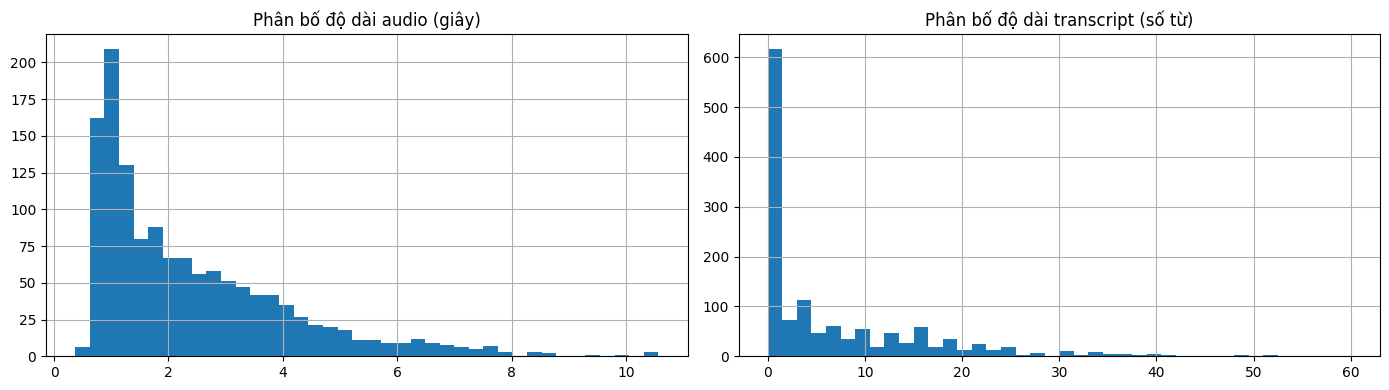

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
df_stats['duration_sec'].hist(bins=40)
plt.title("Phân bố độ dài audio (giây)")

plt.subplot(1, 2, 2)
df_stats['text_length_word'].hist(bins=40)
plt.title("Phân bố độ dài transcript (số từ)")

plt.tight_layout()
plt.show()
